1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

Sol:-In a matrix multiplication of orders (n,k) and (k,m) the number of multiplication and addition depends upon the number of times we will calculate the each entry of the matrix, i.e, if a matrix 'A' has order (n,K) and a matrix 'B' has order (k,m) and if the matrix  'C' is the result of the matrix multiplication then to get the entries in the matrix 'C' ,then we need to multiply each element of row to every column element of the column ,therefore if we have 'n' rows in 1st matrix and 'm' columns in 2nd matrix then we need to multiply (n X m) times, and hence in total 'k' times as 'k' is the  number of columns in 1st matrix and same is number of rows in 2nd matrix which will be total number of entries.

Hence,total multiplication=k X n X m .

As there are (m X n) elements in the resulting matrix, the total number of additions required will be  k-1.

Total additions= (k-1) X n X m




2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [53]:
import time
import numpy as np
import random

def list_of_lists(A, B):
    result = [[0 for _ in range(len(B[0]))] for _ in range(len(A))]

    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]
    
    return result

def generate_random_matrix(rows, cols):
    return [[random.randint(0, 100) for _ in range(cols)] for _ in range(rows)]


rows_A, cols_A = 200, 300
rows_B, cols_B = 300, 200

A = generate_random_matrix(rows_A, cols_A)
B = generate_random_matrix(rows_B, cols_B)

start_time = time.time()
result_list = list_of_lists(A, B)
end_time = time.time()
time_list = end_time - start_time

A_np = np.array(A)
B_np = np.array(B)


start_time = time.time()
result_np = np.dot(A_np, B_np)
end_time = time.time()
time_numpy = end_time - start_time

print(f"Time taken by list of lists for matrix multiplication: {time_list:.4f} seconds")
print(f"Time taken by NumPy for the matrix multiplication: {time_numpy:.4f} seconds")

if time_list > time_numpy:
    print("NumPy is faster")
else:
    print("List of lists is faster")



Time taken by list of lists for matrix multiplication: 2.5919 seconds
Time taken by NumPy for the matrix multiplication: 0.0200 seconds
NumPy is faster


As we can see the difference in the time that , time taken by list of lists for matrix multiplication: 2.5919 seconds and time taken by NumPy for the matrix multiplication: 0.0200 second which clearly shows that 
NumPy is fast. The possilble reasons could be  the optimization and vectorization in the internal implementation of numpy and numpy are more memory efficient than python lists as numpy uses a contiguous block memory storage which improves cache effiency and loads faster while list elements are scattered at different memory locations and therefore accessing elements might be slower due to chances of cache missr

3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In the first approach , to find the median we first start with finding the highest element in the list which will require one complete pass of the array which will give time complexity of O(n) and to find second highest it will take again O(n) and it will  remove the highest element found and iteratively continue to find the medain which will give time complexity of order of O(n-1) until reach the median i.e. for first (n/2) elements. It gives time complexity of O((n^2/2) X n)=~O(n^2).

The better way to find the median of the array is to first sort the array and then directly accesssing the middle element of the array.It will give the time complexity of O(n log n).


In [55]:
import time
import numpy as np
import random

#Given Approach
def median_repeated_passes(arr):
    n = len(arr)
    for i in range((n // 2) + 1):
        max_element = max(arr)
        arr.remove(max_element)
    return max_element if n % 2 != 0 else (max_element + max(arr)) / 2

#proposed approach
def median_sort(arr):
    arr_sorted = sorted(arr)
    n = len(arr_sorted)
    mid = n // 2
    if n % 2 == 1:
        return arr_sorted[mid]
    else:
        return (arr_sorted[mid - 1] + arr_sorted[mid]) / 2

#using numpy.median
def median_with_numpy(arr):
    return np.median(arr)


arr_size = 100000
arr = [random.randint(0, 1000000) for _ in range(arr_size)]

start_time = time.time()
median1 = median_repeated_passes(arr)
end_time = time.time()
time_taken = end_time - start_time
print("Time taken to find median by repeated passes:-",time_taken,"seconds")

start_time = time.time()
median2 = median_sort(arr)
end_time = time.time()
time_taken = end_time - start_time
print("Time taken to find median by proposed approach :-",time_taken,"seconds")

start_time = time.time()
median3 = median_with_numpy(arr)
end_time = time.time()
time_taken = end_time - start_time
print("Time taken to find median by Numpy routine:-",time_taken,"seconds")




Time taken to find median by repeated passes:- 91.43645000457764 seconds
Time taken to find median by proposed approach :- 0.010001420974731445 seconds
Time taken to find median by Numpy routine:- 0.009998559951782227 seconds


Sol:- The best time is given by  the np.median() routine followed by proposed approach in which array is first sorted and then accessing the middle element which is median and the longest time is taken by the repeated pass approach.

4. What is the gradient of the following function with respect to x and y?

           (x^2).y + y^3.sin(x)

Sol:-The gradient of the function w.r.t x and y is:-

Gradient w.r.t x :- 2xy + y^3.cos(x)
Gradient w.r.t y :- x^2 + 3y^2.sin(x)

Therefore Gradient, f(x,y)=(2xy + y^3.cos(x) ,x^2 + 3y^2.sin(x) ) 

5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y.

In [4]:
!pip install --upgrade jax jaxlib
import jax
import jax.numpy as jnp
import numpy as np

def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)


def analytical_grad(x, y):
    df_dx = 2 * x * y + y**3 * jnp.cos(x)
    df_dy = x**2 + 3 * y**2 * jnp.sin(x)
    return df_dx, df_dy

grad_f_x = jax.grad(lambda x, y: f(x, y), argnums=0)  
grad_f_y = jax.grad(lambda x, y: f(x, y), argnums=1)  

x = np.random.randn()
y = np.random.randn()


numerical_grad_x = grad_f_x(x, y)
numerical_grad_y = grad_f_y(x, y)
analytical_grad_val = analytical_grad(x, y)


print("Numerical gradient with respect to x:", numerical_grad_x)
print("Numerical gradient with respect to y:", numerical_grad_y)
print("Analytical gradient:", analytical_grad_val)


Numerical gradient with respect to x: 2.4426906
Numerical gradient with respect to y: 6.933399
Analytical gradient: (Array(2.4426904, dtype=float32, weak_type=True), Array(6.933399, dtype=float32, weak_type=True))


6. Use sympy to confirm that you obtain the same gradient analytically.

In [45]:
import sympy as sp
import jax
import jax.numpy as jnp
import numpy as np

x, y = sp.symbols('x y')
f = x**2 * y + y**3 * sp.sin(x)

df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

grad_sympy_x = sp.lambdify((x, y), df_dx, 'numpy')
grad_sympy_y = sp.lambdify((x, y), df_dy, 'numpy')


def f_jax(x, y):
    return x**2 * y + y**3 * jnp.sin(x)


grad_f_x = jax.grad(lambda x, y: f_jax(x, y), argnums=0) 
grad_f_y = jax.grad(lambda x, y: f_jax(x, y), argnums=1)  


x = np.random.randn()
y = np.random.randn()


numerical_x = grad_f_x(x, y)
numerical_y = grad_f_y(x, y)
analytical_x = grad_sympy_x(x, y)
analytical_y = grad_sympy_y(x, y)


print("Numerical gradient with respect to x (JAX):", numerical_x)
print("Numerical gradient with respect to y (JAX):", numerical_y)
print("Analytical gradient with respect to x (SymPy):", analytical_x)
print("Analytical gradient with respect to y (SymPy):", analytical_y)


Numerical gradient with respect to x (JAX): -1.8107296
Numerical gradient with respect to y (JAX): -0.8793279
Analytical gradient with respect to x (SymPy): -1.8107296432233955
Analytical gradient with respect to y (SymPy): -0.8793279452346423


In [ ]:
9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

 1. y=x
 2. y=x^2
 3. y=(x^3)/100
 4. y=sin(x)
 5. y=sin(x)/x
 6. y=log(x)
 7. y=e^x
 


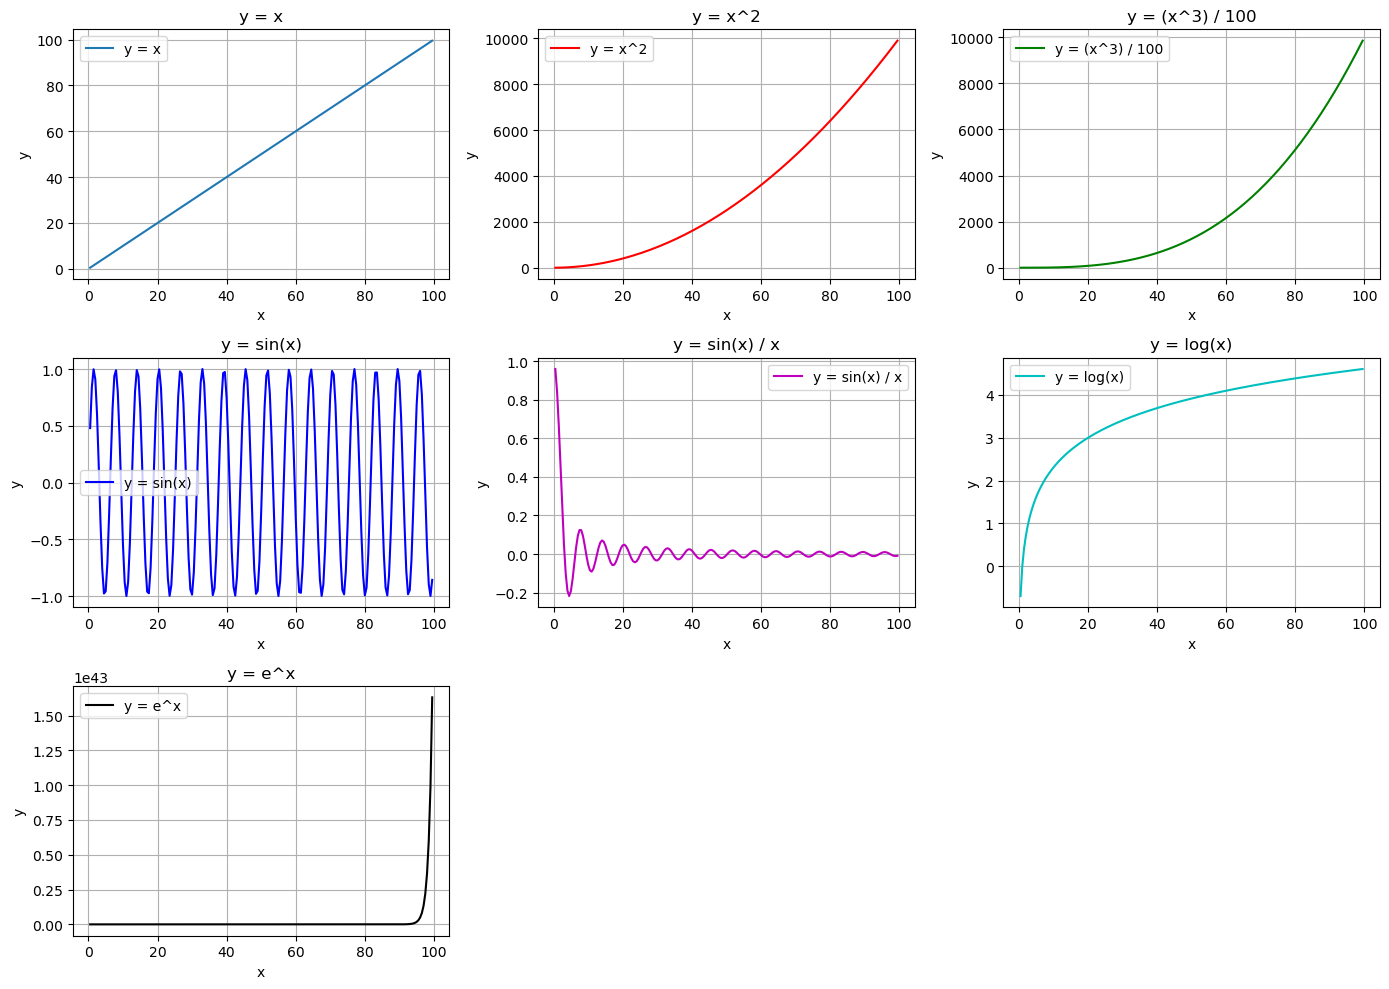

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import math

 
x = np.arange(0.5, 100.0, 0.5)
y1 = x
y2 = x**2
y3 = (x**3) / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)

plt.figure(figsize=(14, 10))

plt.subplot(3, 3, 1)
plt.plot(x, y1, label='y = x')
plt.title('y = x')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(3, 3, 2)
plt.plot(x, y2, label='y = x^2', color='r')
plt.title('y = x^2')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(3, 3, 3)
plt.plot(x, y3, label='y = (x^3) / 100', color='g')
plt.title('y = (x^3) / 100')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(3, 3, 4)
plt.plot(x, y4, label='y = sin(x)', color='b')
plt.title('y = sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(3, 3, 5)
plt.plot(x, y5, label='y = sin(x) / x', color='m')
plt.title('y = sin(x) / x')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(3, 3, 6)
plt.plot(x, y6, label='y = log(x)', color='c')
plt.title('y = log(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(3, 3, 7)
plt.plot(x, y7, label='y = e^x', color='k')
plt.title('y = e^x')
plt.xlabel('x')
plt.ylabel('y')  
plt.grid(True)
plt.legend()

plt.tight_layout()

plt.show()


10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [47]:
import numpy as np
import pandas as pd
 
matrix = np.random.uniform(1, 2, size=(20, 5))
columns = ['a', 'b', 'c', 'd', 'e']

df = pd.DataFrame(matrix, columns=columns)

standarddeviatios = df.std()
max_std_col = standarddeviatios.idxmax()
max_std_value = standarddeviatios.max()

row_means = df.mean(axis=1)
min_mean_row = row_means.idxmin()
min_mean_value = row_means.min()


print("Matrix:",matrix)
print("DataFrame:")
print(df)
print("\nColumn with the highest standard deviation:")
print(f"Column: {max_std_col}")
print(f"Standard Deviation: {max_std_value:.4f}")
print("\nRow with the lowest mean:")
print(f"Row index: {min_mean_row}")
print(f"Mean value: {min_mean_value:.4f}")


Matrix: [[1.73519402 1.96218855 1.24875314 1.57615733 1.59204193]
 [1.57225191 1.22308163 1.95274901 1.44712538 1.84640867]
 [1.69947928 1.29743695 1.81379782 1.39650574 1.8811032 ]
 [1.58127287 1.88173536 1.69253159 1.72525428 1.50132438]
 [1.95608363 1.6439902  1.42385505 1.60639321 1.0191932 ]
 [1.30157482 1.66017354 1.29007761 1.61801543 1.4287687 ]
 [1.13547406 1.29828233 1.56996491 1.59087276 1.57432525]
 [1.65320082 1.65210327 1.43141844 1.8965466  1.36756187]
 [1.43586493 1.89192336 1.80619399 1.70388858 1.10022689]
 [1.91948261 1.7142413  1.99884701 1.1494483  1.86812606]
 [1.16249293 1.61555956 1.12381998 1.84800823 1.80731896]
 [1.56910074 1.4071833  1.069167   1.69742877 1.45354268]
 [1.7220556  1.86638233 1.97552151 1.85580334 1.01171408]
 [1.35997806 1.72999056 1.17162968 1.52103661 1.05433799]
 [1.19999652 1.01852179 1.7936977  1.22392469 1.34535168]
 [1.92808129 1.7044144  1.03183893 1.16469416 1.6214784 ]
 [1.57722859 1.23789282 1.934214   1.61396596 1.5356328 ]
 [1.58

11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [49]:
import numpy as np
import pandas as pd

 
matrix = np.random.uniform(1, 2, size=(20, 5))

columns = ['a', 'b', 'c', 'd', 'e']
df = pd.DataFrame(matrix, columns=columns)

df['f'] = df.sum(axis=1)

df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

number_of_rows_in_g_LT8 = (df['g'] == 'LT8').sum()

std_f_LT8 = df[df['g'] == 'LT8']['f'].std()

std_f_GT8 = df[df['g'] == 'GT8']['f'].std()


print("DataFrame with new column:")
print(df)
print("\nNumber of rows where column 'g' is 'LT8':")
print(number_of_rows_in_g_LT8)
print("\nStandard deviation of column 'f' for rows where 'g' is 'LT8':")
print(f"{std_f_LT8:.4f}")
print("\nStandard deviation of column 'f' for rows where 'g' is 'GT8':")
print(f"{std_f_GT8:.4f}")


DataFrame with new column:
           a         b         c         d         e         f    g
0   1.377752  1.179604  1.024679  1.067250  1.679393  6.328677  LT8
1   1.453697  1.536579  1.896671  1.990339  1.216897  8.094183  GT8
2   1.663078  1.263322  1.020651  1.758379  1.320017  7.025447  LT8
3   1.383464  1.588317  1.831048  1.628982  1.872651  8.304462  GT8
4   1.273542  1.798047  1.185636  1.952792  1.687488  7.897505  LT8
5   1.215508  1.947371  1.730856  1.253942  1.213312  7.360988  LT8
6   1.518201  1.025663  1.207470  1.424685  1.374170  6.550189  LT8
7   1.463575  1.277629  1.586784  1.863856  1.117532  7.309376  LT8
8   1.517379  1.132068  1.716860  1.396060  1.565421  7.327788  LT8
9   1.183280  1.144848  1.488056  1.355613  1.940432  7.112229  LT8
10  1.765325  1.748664  1.903720  1.083422  1.552192  8.053324  GT8
11  1.584476  1.961936  1.292148  1.240829  1.100294  7.179683  LT8
12  1.016430  1.929529  1.669917  1.785153  1.281730  7.682759  LT8
13  1.586410  1.06395

12. Write a small piece of code to explain broadcasting in numpy.

In [43]:
#Broadcasting in python

#Example

array1 =np.array([1.0,3.0,5.0,7.0,9.0])
array2 =4.0
mul_array3=array1 * array2
print("Shape of array1:-", array1.shape)
print("Multiplication between array1 and array2",mul_array3)
print("Shape of result:-",mul_array3.shape)

#Explaination:-
''' Numpy uses broadcasting when the shape of array are not compatible in the arithmeric operations.It provides a solution when shapes are not similar as
it broadcast the smaller array across the larger array to have compatible shape and therefore we can perform arithemetic operation. As array2 is scalar and array1 is array with shape (5,) , but still when multiplication is done between array1 and array2 the result is given and
no error related to "Incompatible size" is thrown ,the reason being broadcasting ,in which scalar 'array2' is being stretched during multiplication 
operation into an array with same shape as (5,), which is a shape of array1 and therefore the result is stored in variable named "mul_array3", which 
also has a shape of (5,).In this way broadcasting is being used.'''




Shape of array1:- (5,)
Multiplication between array1 and array2 [ 4. 12. 20. 28. 36.]
Shape of result:- (5,)


' Numpy uses broadcasting when the shape of array are not compatible in the arithmeric operations.It provides a solution when shapes are not similar as\nit broadcast the smaller array across the larger array to have compatible shape and therefore we can perform arithemetic operation. As array2 is scalar and array1 is array with shape (5,) , but still when multiplication is done between array1 and array2 the result is given and\nno error related to "Incompatible size" is thrown ,the reason being broadcasting ,in which scalar \'array2\' is being stretched during multiplication \noperation into an array with same shape as (5,), which is a shape of array1 and therefore the result is stored in variable named "mul_array3", which \nalso has a shape of (5,).In this wat broadcasting is being used.'